# Word Embedding


Consider the following sentence.

        “Apple is a tasty fruit”
        
This notebook concerns with the following question about this sentence. 

    How do we make a computer to understand that “Apple” in this sentence is a fruit that can be eaten and not a company?
    
      
It is one of the main questions in Natural Language Processing (NLP).

One approach to address this question is to create a representation for words that capture their
- meanings
- semantic relationships and 
- the different types of contexts they are used in

This can be implemented by using **numerical representations** of texts so that computers may handle them. These are known as **Word Embeddings**.


Word embedding is the collective name for a set of language modeling and feature learning techniques in NLP where words or phrases from the vocabulary are **mapped to vectors of real numbers**. 

Word Embeddings are the texts converted into numbers and there may be different numerical representations of the same text.


## Different types of Word Embeddings

Word embeddings can be broadly classified into two categories.

- Frequency based Embedding
- Prediction based Embedding


## Frequency based Embedding

There are generally three types of vectors that we encounter under this category.

- Count Vector
- TF-IDF Vector
- Co-Occurrence Vector

See the notebook "Feature Extraction for Text Analytics" for the first two frequency based embedding techniques.
https://github.com/rhasanbd/Text-Analytics-Beginners-Toolbox/blob/master/Text%20Analytics-I-Feature%20Extraction.ipynb




## Prediction based Embedding


The frequency based methods use deterministic methods to compute word vectors. They **don't consider the contextual nature of the words** in the text while creating numerical representation. As a consequence, the word representations are not very powerful. 

To overcome this limitation a prediction based approach for word embedding was proposed in 2013 by a team of researchers led by Google’s Tomas Mikolov. It's known as **Word2vec**, which is a group of related models that are used to produce word embeddings.

https://arxiv.org/pdf/1301.3781.pdf

These methods are **prediction based** in the sense that they provided probabilities to the words and proved to be state of the art for tasks like word analogies and word similarities. Using Word2vec embedding it is possible to **encode semantic context of a word into its vector representation**. The learned vectors explicitly encode many linguistic regularities and patterns. As a consequence, we can process the words using rules of vector algebra to deduce facts. Consider the following example.

Using Word2vec we can represent the following four words as vectors of real numbers: King, Man, Woman, and Queen.

Then, we can perform an arithmmetic operation like this on the word embeddings (vectors) as follows.

    vec("King") - vec("Man") + vec("Woman") is closer to vec("Queen") than to any other vector.


## Word2vec Methods

Word2vec has two primary methods of contextualizing words:

- Continuous Bag-of-Words model (CBOW)
- Skip-Gram model

Both methods arrive at a similar conclusion, but take nearly inverse paths to get there. These methods are based on two-layer Artificial Neural Networks (ANN) that map word(s) to the target variable, which is also a word(s). Both of these techniques learn weights which act as word vector representations. 


<img src="https://cse.unl.edu/~hasan/Pics/Word2vec-Architecture.png" width=600, height=200>


The ANNs are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located close to one another in the space.

See the notebook "Multi-Layer Perceptron: Curious Dabbling" for a quick introduction to a shallow ANN type known as Multi-Layer Perceptron (MLP).

https://github.com/rhasanbd/Multi-Layer-Perceptron-Curious-Dabbling

 

## How are the Word2vec Embeddings Obtained?

A Word2vec model is a simple ANN with a **single hidden layer**. The task of this model is to predict the nearby words for each and every word in a sentence. 

Say that we have a large corpus of text. From that corpus we create a vocabulary that contains the unique words present in the corpus. Given a word we want to predict the probability of nearby words from the vocabulary.

Consider the following sentence to understand how a Word2vec model works. 

<div>
<font size="5">

<span style='background:yellow'> Feynman  </span>
<span style='background: lightgreen'> taught Physics </span> passionately.
</font>
</div>


Let’s say the word "Feynman" (highlighted in yellow) is our input word. It has a context window of size 2. This means we are considering only the 2 adjacent words on either side of the input word as the nearby words.

The size of the context window is not fixed, it can be changed as per our requirement.

Now, the task is to pick the nearby words (words in the context window) one-by-one and find the probability of every word in the vocabulary of being the selected nearby word. 



## Dataset for Training Word2vec ANN

We need a labeled dataset to train the ANN model. The dataset should have a set of inputs and an output for every input. 

We create a labeled dataset from the corpus to train a Word2vec model. Below we give an example to illustrate how a labeled dataset is created from a single sentence.

The yellow highlighted word (in the above example) is our input and the words highlighted in green are the output words. We use a window size of 2 words. Let’s start with the first word as the input word.


| Input | Output |
| :--- | :--- | 
|Feynman | taught |
|Feynman | Physics |


We continue this process until the last word of the sentence. In the end, the complete training data from this sentence will look like this.


| Input | Output |
| :--- | :--- | 
|Feynman | taught |
|Feynman | Physics |
|taught | Feynman |
|taught | Physics |
|taught | passionately |
|Physics | Feynman |
|Physics | taught |
|Physics | passionately |
|passionately | taught |
|passionately | Physics |


We have extracted 10 training samples out of a single sentence. 

Let's discuss how to obtain word embeddings by using the two methods of Word2vec: Continuous Bag-of-Words model (CBOW) and Skip-Gram model


## Continuous Bag-of-Words (CBOW) Model

CBOW is the less popular of the two models. It uses context (source) words to predict the target words. For example, take the sentence "Feynman taught Physics passionately". In this instance, the target word is "passionately", while the context words are "Feynman taught Physics". 

CBOW is primarily used in smaller datasets, since it **treats the context of the sentence as a single observation** towards predicting the target word. In practice, this becomes very inefficient when working with a large set of words.



## Skip-Gram Model

The Skip-Gram model works in the opposite fashion of the CBOW model. It uses target words to **predict the source, or context**, of the surrounding words. 

Suppose that we have a sliding window of a fixed size moving along a sentence: the word in the middle is the "target" and those on its left and right within the sliding window are the context words. The skip-gram model is trained to predict the probabilities of a word being a context word for the given target.

The following example demonstrates multiple pairs of target and context words as training samples, generated by a 3-word window sliding along the sentence.

The Skip-Gram model will break the sentence into (target, context) pairs. Let's say that we have context window of 1 on both sides of the target. Then, we will get a set of pairs for the sentence "Feynman taught Physics passionately".


| Sliding window (size = 3) | Input (Target) | Output (Context) |
| :--- | :--- | :--- | 
|[Feynman taught] | Feynman | [taught, ] |
|[Feynman taught Physics] | taught | [Feynman, Physics] |
|[taught Physics passionately]  | Physics | [taught, passionately] |
|[Physics passionately] | passionately | [Physics, ] |


Each context-target pair is treated as a new observation in the data. For example, the target word "Physics" in the above case produces two training samples: ("Physics", "taught") and ("Physics", "passionately").



## Skip-gram Model Architecture

Let's describe the skip-gram model. The architecture is shown below.

- V = size of vocabulary
- N = length of word embeddings (number of hidden units/neurons in ANN)
- Input = one-hot-encoded vectors 
- Output = the probability of being the nearby word for every word in the vocabulary

Given the vocabulary size $V$, the skip-gram model learns word embedding vectors of size $N$. The model learns to predict one context word (output) using one target word (input) at a time.

For example, consider an input word "Physics". It is represented as a one-hot vector $\vec{x}$. This vector will have $V$ components (one for every word in our vocabulary). We place a "1" in the position corresponding to the word "Physics", and 0s in all of the other positions. The output of the skip-gram ANN is a single vector (also with $V$ components) containing, for every word in our vocabulary, the probability that a randomly selected nearby word (e.g., "passionately") is that vocabulary word.


<img src="https://cse.unl.edu/~hasan/Pics/Skip-gram.png" width=600, height=200>


It is **important** to note the distinction between **training** and **evaluation** of the network.
- When training this network on word pairs, the input is a one-hot vector representing the input word and the training output is also a one-hot vector representing the output word. 
- But when we **evaluate** the trained network on an input word, the output vector will actually be a **probability distribution** (i.e., a bunch of floating point values, not a one-hot vector).


Let's describe the network in detail below.


- Both input word $w_i$ and the output word $w_j$ are one-hot encoded into binary vectors $x$ and $y$ of size $V$.

- First, the multiplication of the binary vector $\vec{x}$ and the word embedding matrix $W$ of size $V x N$ gives us the embedding vector of the input word $w_i$: the $i$-th row of the matrix $W$.

- This newly discovered embedding vector of dimension $N$ forms the hidden layer.

- The multiplication of the hidden layer and the word context matrix $W^{\prime}$ of size $N x V$ produces the output vector $y$.

- The output layer is a softmax regression classifier. Each output neuron (one per word in our vocabulary) will produce an output between 0 and 1, and the sum of all these output values will add up to 1. Specifically, each output neuron has a weight vector which it multiplies against the word vector from the hidden layer, then it applies the function exp(x) to the result. Finally, in order to get the outputs to sum up to 1, we divide this result by the sum of the results from all $V$ output nodes.

- The output context matrix $W^{\prime}$ encodes the meanings of words as context, different from the embedding matrix $W$. 

NOTE: Despite the name, $W^{\prime}$ is independent of $W$, not a transpose or inverse or whatsoever.



<img src="https://cse.unl.edu/~hasan/Pics/Skip-gram-full.png" width=600, height=200>


Once this model is trained, we can easily extract the **learned weight matrix $W(V x N)$ and use it to extract the word vectors**. Each row in this matrix is a word vector of dimension $N$.

Following figure shows a word-vector matrix for a vocabulary size $V = 5000$ and enbedded word-vector length $N = 100$. The first row of this matrix corresponds to the first word in the vocabulary, the second to the second, and so on. That is how we get the fixed size word vectors or embeddings by Word2vec. 

<img src="https://cse.unl.edu/~hasan/Pics/Skip-gram-Word-Vector-Matrix.png" width=600, height=200>


## Visualizing the Semantic and Syntactic Relationships Between Words

Similar words in this dataset would have similar vectors, i.e., vectors pointing towards the same direction. Words that share semantic or syntactic relationships will be represented by vectors of similar magnitude and be mapped in close proximity to each other in the word embedding.

For visualization, the word vectors can be reduced to two dimensions using the t-SNE dimensionality reduction technique. Once the word vectors are reduced to two-dimensions, it is possible to see relationships between certain words. Examples of a semantic relationship are male/female designations and Country/Capital relationships, while an example of syntactic relationship is past vs. present tense. 
 

<img src="https://cse.unl.edu/~hasan/Pics/Skip-gram-Semantic-Relationship.png" width=600, height=600>






# Word2vec - Implementation


In this notebook we use the Word2vec model to create word embeddings for the words in a corpus.


We use the **Gensim** Word2vec API. 

https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html


We perform the following tasks.

- Pre-process dataset
- Create word embeddings
- Visualize the embedded words in two-dimension


## Dataset

The dataset provides reviews of a single hotel. These reviews are given by customers. 

The input CSV file (hotel-reviews.csv) contains one row for each of the 38932 reviews. It includes the following fields

- User_ID: ID
- Description: Customer Review
- Browser_Used: Browser used to post the review
- Device_Used: Device used to post the review
- Is_Response: Sentiment/Polarity of the review

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package wordnet to /Users/hasan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and Explore Data

In [3]:
df = pd.read_csv('/Users/hasan/datasets/hotel-reviews.csv')

df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


## Description of the Data

DataFrame’s info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
User_ID         38932 non-null object
Description     38932 non-null object
Browser_Used    38932 non-null object
Device_Used     38932 non-null object
Is_Response     38932 non-null object
dtypes: object(5)
memory usage: 1.5+ MB


## Dimension the Data

Get the dimension (number of rows and columns) of the data using DataFrame's shape method.

In [5]:
print("Dimension of the data: ", df.shape)

no_of_rows = df.shape[0]
no_of_columns = df.shape[1]

print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

Dimension of the data:  (38932, 5)
No. of Rows: 38932
No. of Columns: 5


## Convert the DataFrame Object into a 2D Array of Documents

We convert the documents (the "Description" column) from DataFrame object to an array of documents.

It's a 2D array in which each row reprents a document.

In [6]:
docs_array = df['Description']

print("Dimension of the documents array: ", docs_array.shape)

#print(docs_array.dtype)

# Display the first document
print(docs_array[0])

Dimension of the documents array:  (38932,)
The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.


## Pre-process the Dataset


We pre-process the data as follows. 

- Convert to lowercase 
- Tokenize (split the documents into tokens or words)
- Remove numbers, but not words that contain numbers
- Remove words that are only one character
- Lemmatize the tokens/words


### Tokenization

We tokenize the text using a regular expression tokenizer from NLTK. We remove numeric tokens and tokens that are only a single character, as they don’t tend to be useful, and the dataset contains a lot of them.


The NLTK Regular-Expression Tokenizer class "RegexpTokenizer" splits a string into substrings using a regular expression. We use the regular expression "\w+" to matche token of words. 

- "\w" instructs to escape words.
- "+" is a quantifier that means 1 or more. 

See the following two links for a list of regular expressions and NLTK tokenize module.
https://github.com/tartley/python-regex-cheatsheet/blob/master/cheatsheet.rst
https://www.nltk.org/api/nltk.tokenize.html


## Function to Convert the 2D Document Array into a 2D Array of Tokenized Documents

In [6]:
# Function for converting a list of sentences to a list of lists containing tokenized words

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+') # Tokenize the words.
    
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

## Convert the 2D Document Array into a 1D Array of Tokenized Words

In [7]:
# Convert a list of sentences to a list of lists containing tokenized words
%time docs = docs_preprocessor(docs_array)

Wall time: 42.4 s


In [8]:
print("Length of the 2D Array of Tokenized Documents: ", len(docs))

Length of the 2D Array of Tokenized Documents:  38932


## Compute Bigrams/Trigrams:


When topics are very similar, we may **use phrases** rather than single/individual words to distinguis each topic. 

Thus, we compute both bigrams (and may be trigrams). 
- Depending on the dataset it may not be necessary to create trigrams.

Note that we only keep the **frequent** phrases (bigrams/trigrams).

#### Bigrams
Bigrams are sets of two adjacent words. Using bigrams we can get phrases like “machine_learning” in our output (spaces are replaced with underscores). Without bigrams we would only get “machine” and “learning”.

        Note that in the code below, we find bigrams and then add them to the original data, because we would like to keep the words “machine” and “learning” as well as the bigram “machine_learning”.
        
        

We use gensim.models.Phrases to create the bigrams. Following parameters are set:

- sentences (iterable of list of str, optional) – The sentences iterable can be simply a list.

- min_count (float, optional) – Ignore all words and bigrams with total collected count lower than this value.

- threshold (float, optional) – Represent a score threshold for forming the phrases (higher means fewer phrases). A phrase of words a followed by b is accepted if the score of the phrase is greater than threshold. Heavily depends on concrete scoring-function, see the scoring parameter.

- scoring ({'default', 'npmi', function}, optional) – Specify how potential phrases are scored. scoring can be set with either a string that refers to a built-in scoring function, or with a function with the expected parameter names. Two built-in scoring functions are available by setting scoring to a string:

        -- ”default”: The default is the PMI-like scoring as described by Mikolov, et. al: “Distributed Representations of Words and Phrases and their Compositionality”.

        -- ”npmi”: It is more robust when dealing with common words that form part of common bigrams, and ranges from -1 to 1, but is slower to calculate than the default. The 'threshold' should be between -1 and +1.

In [9]:
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 10 times or more).
bigram = Phrases(docs, min_count=10, threshold=0.5, scoring='npmi')
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

## Training the Word2vec Model

We use the gensim.models.Word2Vec class.

        class gensim.models.word2vec.Word2Vec(sentences=None, corpus_file=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, iter=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), max_final_vocab=None)

We need to set the parameters of the Word2Vec object carefully. The full list of the parameters are given:

https://radimrehurek.com/gensim/models/word2vec.html


#### Below we discuss the setting of some of the key parameters.


- sentences (iterable of iterables, optional)

        The sentences iterable can be simply a list of lists of tokens, but for larger corpora, consider an iterable that streams the sentences directly from disk/network. If you don’t supply sentences, the model is left uninitialized – use if you plan to initialize it in some other way.

- corpus_file (str, optional)

        Path to a corpus file in LineSentence format. You may use this argument instead of sentences to get performance boost. Only one of sentences or corpus_file arguments need to be passed (or none of them, in that case, the model is left uninitialized).

- size (int, optional)

        Dimensionality of the word vectors.

- window (int, optional)

        Maximum distance between the current and predicted word within a sentence.

- min_count (int, optional)

        Ignores all words with total frequency lower than this.

- workers (int, optional)

        Use these many worker threads to train the model (=faster training with multicore machines).

- sg ({0, 1}, optional)

        Training algorithm: 1 for skip-gram; otherwise CBOW.

- hs ({0, 1}, optional)

        If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero, negative sampling will be used.


- iter (int, optional)

        Number of iterations (epochs) over the corpus.
        
        
- sample (float, optional)

        The threshold for configuring which higher-frequency words are randomly downsampled, useful range is (0, 1e-5).


Some important attributes are the following:

- wv (Type: Word2VecKeyedVectors)

        This object essentially contains the mapping between words and embeddings. After training, it can be used directly to query those embeddings in various ways. See the module level docstring for examples.



- vocabulary (Type: Word2VecVocab)

        This object represents the vocabulary (sometimes called Dictionary in gensim) of the model. Besides keeping track of all unique words, this object provides extra functionality, such as constructing a huffman tree (frequent words are closer to the root), or discarding extremely rare words.



- trainables (Type: Word2VecTrainables)

        This object represents the inner shallow neural network used to train the embeddings. The semantics of the network differ slightly in the two available training modes (CBOW or SG) but you can think of it as a NN with a single projection and hidden layer which we train on the corpus. The weights are then used as our embeddings (which means that the size of the hidden layer is equal to the number of features self.size).



In [10]:
# Set training parameters
size = 300       # Dimension of the word vector
window_size = 2  # We set it 2 as the sentences weren't too long
epochs = 100     # Number of iterations (epochs) over the corpus
min_count = 2    # Ignores all words with total frequency lower than min_count
workers = 4

# Train the Word2vec model using gensim (use the skip-gram model: sg = 1)
%time model = Word2Vec(docs, sg=1,window=window_size,size=size, min_count=min_count,workers=workers,
                       iter=epochs,sample=0.01)

Wall time: 10min 34s


## Save the Model Locally

In [11]:
model.save('w2v_model_hotel_review')

## Load the Saved Model

In [12]:
# load word2vec model
model = Word2Vec.load('w2v_model_hotel_review')

## Model Evaluation

There is no easy way to evaluate the trained model.

One approach could be to see whether the model has learned the semantic representation of the words.

For this we use model's "wv" object. It contains the mapping between words and embeddings. It has several methods that we can use for our evaluation.

https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.Word2VecKeyedVectors


#### most_similar(positive=None, negative=None, topn=10, clip_start=0, clip_end=None, indexer=None)

Find the top-N most similar word vectors from the training set. Positive word vectors contribute positively towards the similarity, negative word vectors negatively. This method computes cosine similarity between a simple mean of the projection weight vectors of the given docs. 

- Parameters

        positive: List of doctags/indexes that contribute positively.

        negative: List of doctags/indexes that contribute negatively.

        topn: Number of top-N similar word vectors to return, when topn is int. When topn is None, then similarities for all docvecs are returned.


- Returns
Sequence of (doctag/index, similarity).



#### similarity(entity1, entity2)
Compute cosine similarity between two entities, specified by their string id.


#### closer_than(entity1, entity2)
Get all entities that are closer to entity1 than entity2 is to entity1.


#### doesnt_match(words)
Which word from the given list doesn’t go with the others?

- Parameters: List of words.

- Returns: The word further away from the mean of all words.

#### similar_by_word(word, topn=10, restrict_vocab=None)
Find the top-N most similar words.

- Parameters
        word: Word

        topn: Number of top-N similar words to return. If topn is None, similar_by_word returns the vector of similarity scores.


- Returns
When topn is int, a sequence of (word, similarity) is returned. When topn is None, then similarities for all words are returned as a one-dimensional numpy array with the size of the vocabulary.



#### word_vec(word, use_norm=False)
Get word representations in vector space, as a 1D numpy array.

- Parameters

        word:Input word

        use_norm (bool, optional): If True - resulting vector will be L2-normalized (unit euclidean length).

- Returns

    Vector representation of word.




## Evaluation 1: Find Similar Words

In [13]:
model.wv.most_similar('great')

[('fantastic', 0.6079802513122559),
 ('excellent', 0.5850784182548523),
 ('wonderful', 0.563950777053833),
 ('good', 0.5633939504623413),
 ('penthhouse', 0.5185569524765015),
 ('perfect', 0.5061847567558289),
 ('enviable', 0.49914953112602234),
 ('awesome', 0.4915556311607361),
 ('superfriendly', 0.48937687277793884),
 ('optimum', 0.48914510011672974)]

In [14]:
model.wv.most_similar('recommend')

[('recommned', 0.6109941005706787),
 ('edited', 0.5900030136108398),
 ('highly', 0.5708405375480652),
 ('recommed', 0.5612903237342834),
 ('recomment', 0.5144060254096985),
 ('recommmend', 0.4928995370864868),
 ('suggest', 0.4882645308971405),
 ('reccommend', 0.4854534864425659),
 ('recommand', 0.47864001989364624),
 ('recoomend', 0.4612264931201935)]

## Evaluation 2: Find Top N Similar Words

In [15]:
model.wv.similar_by_word('room', topn=5)

[('romms', 0.5388739109039307),
 ('bedroon', 0.5169844627380371),
 ('bathrom', 0.5019680261611938),
 ('bathroom', 0.47570157051086426),
 ('kitchnette', 0.4740534722805023)]

## Evaluation 3: Find Similarity Values

In [16]:
model.wv.similarity("breakfast", "restaurant")

0.32203564

In [17]:
model.wv.similarity("breakfast", "morning")

0.34782642

In [18]:
model.wv.similarity("breakfast", "night")

0.25368035

In [19]:
model.wv.similarity("breakfast", "parking")

0.24017209

In [20]:
model.wv.similarity("breakfast", "queen")

0.15717466

## Evaluation 4: Get All Words that are closer to Word 1 than Word 2 

In [21]:
model.wv.closer_than("great", "wonderful")

['excellent', 'fantastic']

## Evaluation 5: Perform Vector Translation

In [22]:
model.wv.most_similar(positive=['room', 'sofa'], topn=1)

[('couch', 0.551425039768219)]

In [23]:
model.wv.most_similar(positive=['suite', 'sofa'], negative=['cafe'], topn=1)

[('floorplan', 0.40220046043395996)]

In [24]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('queen', 0.35765814781188965),
 ('seaview', 0.3306652307510376),
 ('bedroon', 0.3278576731681824)]

In [25]:
model.wv.most_similar(positive=['room', 'shower'], negative=['bedroom'], topn=1)

[('bathroom', 0.445379376411438)]

## Evaluation 6: Word from the given List doesn’t go with the Others

In [26]:
# Which of the below does not belong in the sequence?
model.wv.doesnt_match('hotel nice clean holiday'.split())

c:\program files\python37\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'holiday'

## Vocabulary

It is important to know the vocabulary size. The "perplexity" parameter of the t-SNE visualization model is set based on this.

In [27]:
print("Vocabulary Size: ", len(model.wv.vocab))

# print("Vocabulary: ")
# for word in model.wv.vocab:
#     print(" ", word)

Vocabulary Size:  29601


## Visualize Word Embedding in 2D using t-SNE

We plot the vocabulary in 2D using t-SNE.

Note that t-SNE would be extremely slow because of the larze size of vocabulary. That's why first we apply PCA to reduce the number of dimensions, then apply t-SNE.

In [28]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = [] # stores the words (labels)
    tokens = [] # stores word vectors

    for word in model.wv.vocab:
        tokens.append(model.wv.__getitem__(word))
        labels.append(word)
        
    pca_tsne = Pipeline([
        ("pca", PCA(n_components=0.95, random_state=42)),
        
        # perplexity should be much smaller than the size of the vocabulary
        ("tsne", TSNE(n_components=2, perplexity=30, random_state=42)),
    ])
    

    new_values = pca_tsne.fit_transform(tokens)


    # get the two coordinates in two lists
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],  # text of the annotation
                     xy=(x[i], y[i]), # The point (x,y) to annotate.
                     xytext=(5, 2),   # The position (x,y) to place the text at. If None, defaults to xy.
                     textcoords='offset points', # The coordinate system that xy text is given in.
                     ha='right', # horizontal alignment
                     va='bottom') # vertical alignment
    plt.xticks([])
    plt.yticks([])
    plt.show()

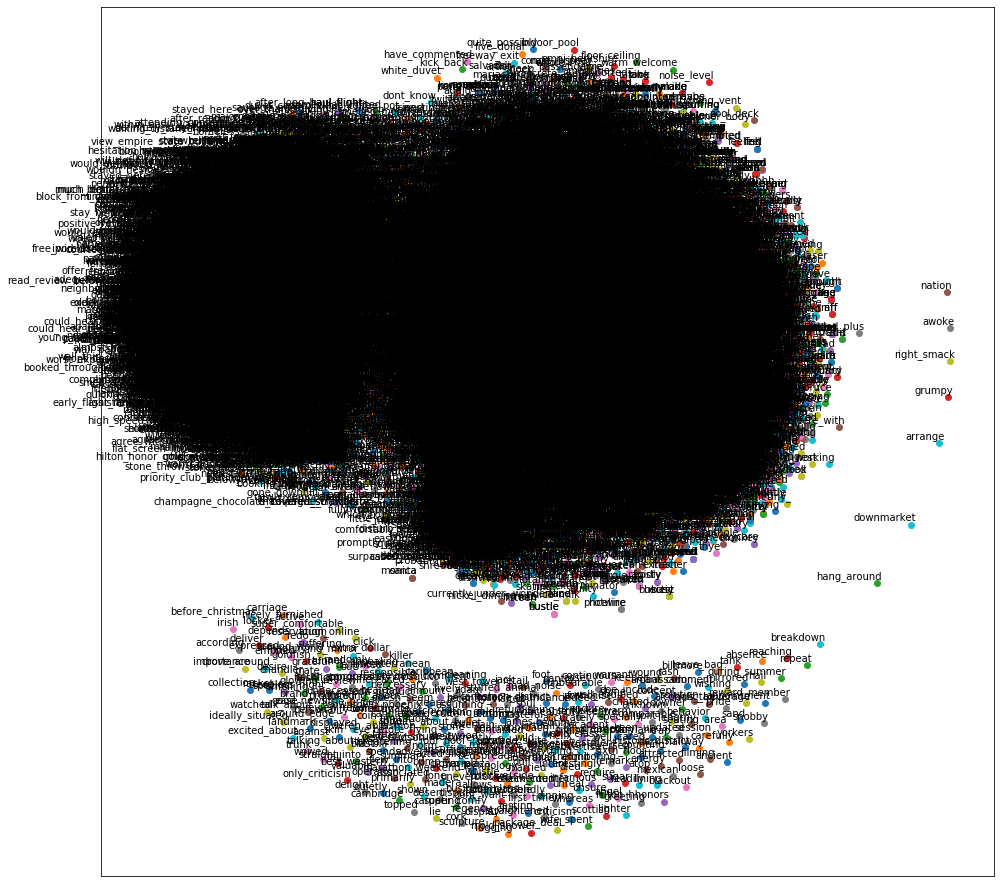

Wall time: 29min 42s


In [29]:
%time tsne_plot(model)

## Creating Useful Visualization

The above 2D plot of the vocabulary is not very useful. Because we plotted all the words, most of which are overlapped.

For meaningful investigation of the semantic relationship among the words, we need to create a subset of the vocabulary for plotting. 

Mini-Vocabulary Size:  30


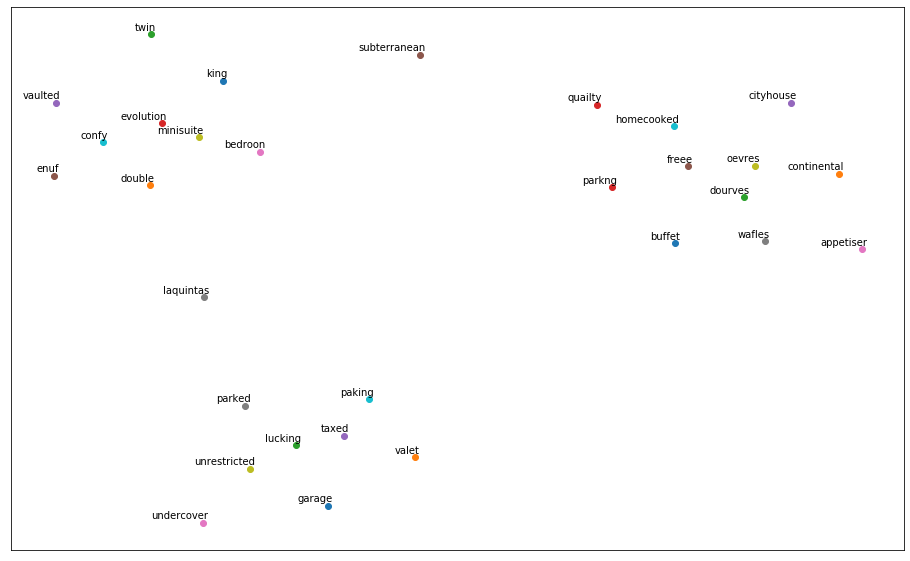

In [30]:
'''

Create a subset of the vocabulary that contains 
- a set of words
- words most similar to these words

'''
key_words = ['breakfast', 'parking', 'queen']

words = [] # subset of vocabulary

for k in key_words:
    for i in range(len(model.wv.most_similar(k))):
        words.append(model.wv.most_similar(k)[i][0])
        
        
print("Mini-Vocabulary Size: ", len(words))
    
# # Display the vocabulary subset   
# for i in words:
#     print(i)


'''
Visualization by PCA+t-SNE
'''
labels = [] # stores the words (labels)
tokens = [] # stores word vectors
    
    
for word in words:
    tokens.append(model.wv.__getitem__(word))
    labels.append(word)
        
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    
    # perplexity should be much smaller than the size of the vocabulary
    ("tsne", TSNE(n_components=2, perplexity=3, random_state=42)), 
])


new_values = pca_tsne.fit_transform(tokens)


# get the two coordinates in two lists
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 10)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],  # text of the annotation
                 xy=(x[i], y[i]), # The point (x,y) to annotate.
                 xytext=(5, 2),   # The position (x,y) to place the text at. If None, defaults to xy.
                 textcoords='offset points', # The coordinate system that xy text is given in.
                 ha='right', # horizontal alignment
                 va='bottom') # vertical alignment

plt.xticks([])
plt.yticks([])
plt.show()